In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Kuesioner Mihu-mihu - Sheet5.csv")
df

,NAMA,NPM,FAKULTAS,JURUSAN,SEMESTER,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW
0,Fryan Ilham Satriya,24081010209,Fakultas Ilmu Komputer,Informatika,3,3.93,Ya,1,3 = Cukup penting,3,5,Tidak,1,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya
1,Najwa Sofia,24083010115,Fakultas Ilmu Komputer,Sains Data,3,3.67,Ya,1,3 = Cukup penting,5,4,Tidak,4,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak
2,Sendy Luis Armando,24081010102,Fakultas Ilmu Komputer,Informatika,3,3.50,Tidak,0,3 = Cukup penting,2,1,Ya,2,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya
3,Achmad Mukhlis,22082010097,Fakultas Ilmu Komputer,Sistem Informasi,7,3.78,Ya,2,3 = Cukup penting,3,2,Tidak,0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak
4,Hanif Ziva Zavira,22083010078,Fakultas Ilmu Komputer,Sains Data,7,3.93,Tidak,0,2 = Kurang penting,5,3,Ya,3,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Maryati Margaretha Simbolon,24052010096,Fakultas Arsitektur dan Desain,DKV,3,3.00,Tidak,0,3 = Cukup penting,6,4,Ya,0,1 = Tidak berpengaruh,Tidak,4 = Berdampak,Ya
153,Isna Shetia,23082010204,Fakultas Ilmu Komputer,Sistem Informasi,5,3.80,Ya,3,4 = Penting,8,2,Tidak,0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya
154,Hizkia Samhan Rezayoshi,24083010019,Fakultas Ilmu Komputer,Sains Data,3,3.80,Ya,1,3 = Cukup penting,3,1,Tidak,2,3 = Cukup berpengaruh,Tidak,3 = Cukup berdampak,Ya
155,Raffi Akbar Ramadhan,24071010121,Fakultas Hukum,Ilmu Hukum,3,3.79,Ya,3,3 = Cukup penting,2,2,Tidak,5,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya


In [5]:
# drop kolom
df = df.drop(columns=["NAMA", "NPM", "SEMESTER"])

# cek hasil
df.head()

,FAKULTAS,JURUSAN,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW
0,Fakultas Ilmu Komputer,Informatika,3.93,Ya,1,3 = Cukup penting,3,5,Tidak,1,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya
1,Fakultas Ilmu Komputer,Sains Data,3.67,Ya,1,3 = Cukup penting,5,4,Tidak,4,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak
2,Fakultas Ilmu Komputer,Informatika,3.50,Tidak,0,3 = Cukup penting,2,1,Ya,2,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya
3,Fakultas Ilmu Komputer,Sistem Informasi,3.78,Ya,2,3 = Cukup penting,3,2,Tidak,0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak
4,Fakultas Ilmu Komputer,Sains Data,3.93,Tidak,0,2 = Kurang penting,5,3,Ya,3,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak


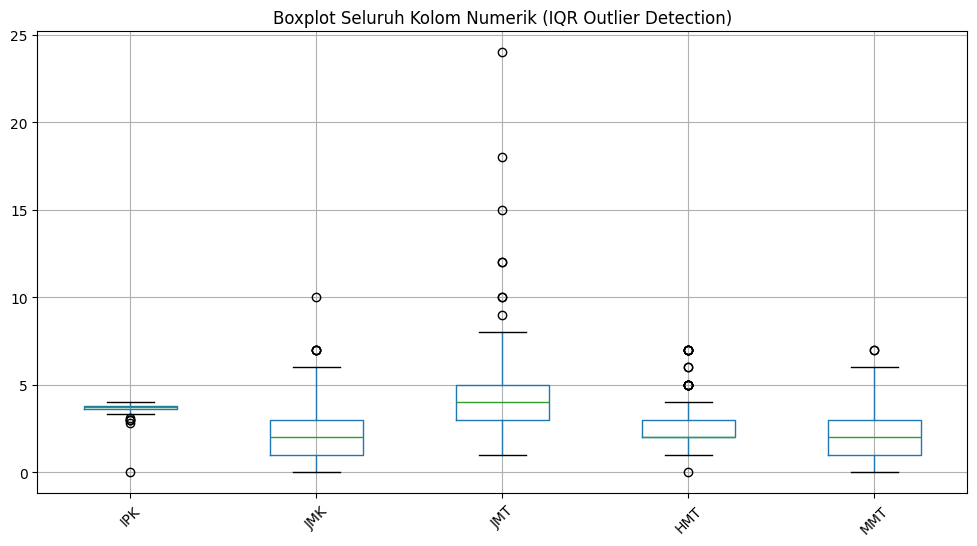

{'IPK': 6, 'JMK': 5, 'JMT': 8, 'HMT': 18, 'MMT': 2}

In [6]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using IQR
outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_info[col] = len(outliers)

# Boxplot visualization
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Seluruh Kolom Numerik (IQR Outlier Detection)")
plt.show()

outlier_info

Kolom yang akan diimputasi: ['IPK', 'JMK', 'JMT', 'HMT', 'MMT']


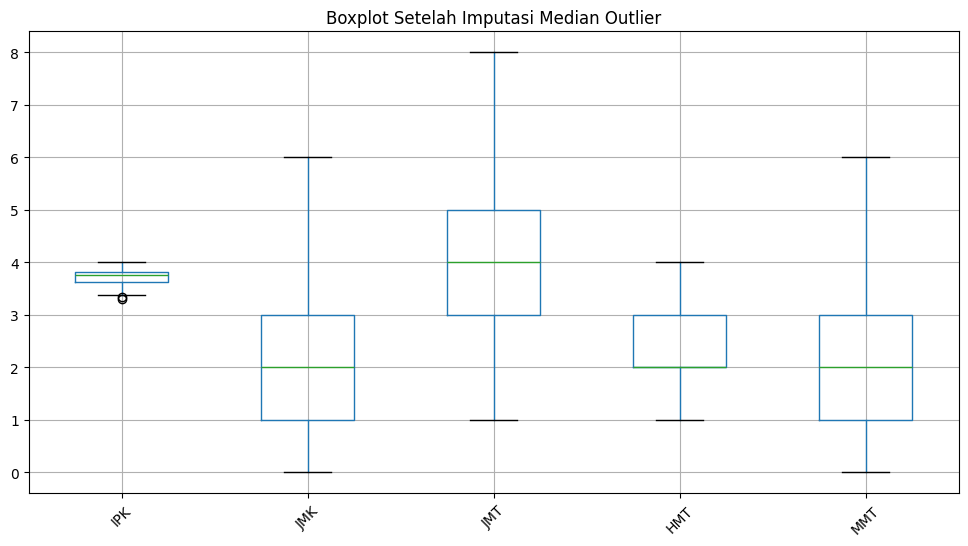

In [7]:
# Ambil kolom yang punya outlier (>0)
outlier_cols = [col for col, count in outlier_info.items() if count > 0]

# Buang kolom SEMESTER jika ada
if "SEMESTER" in outlier_cols:
    outlier_cols.remove("SEMESTER")

print("Kolom yang akan diimputasi:", outlier_cols)

# Imputasi median pada outlier
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median_value = df[col].median()

    # ganti nilai outlier dengan median
    df[col] = df[col].apply(
        lambda x: median_value if (x < lower or x > upper) else x
    )

# Visualisasi boxplot setelah imputasi
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Imputasi Median Outlier")
plt.show()

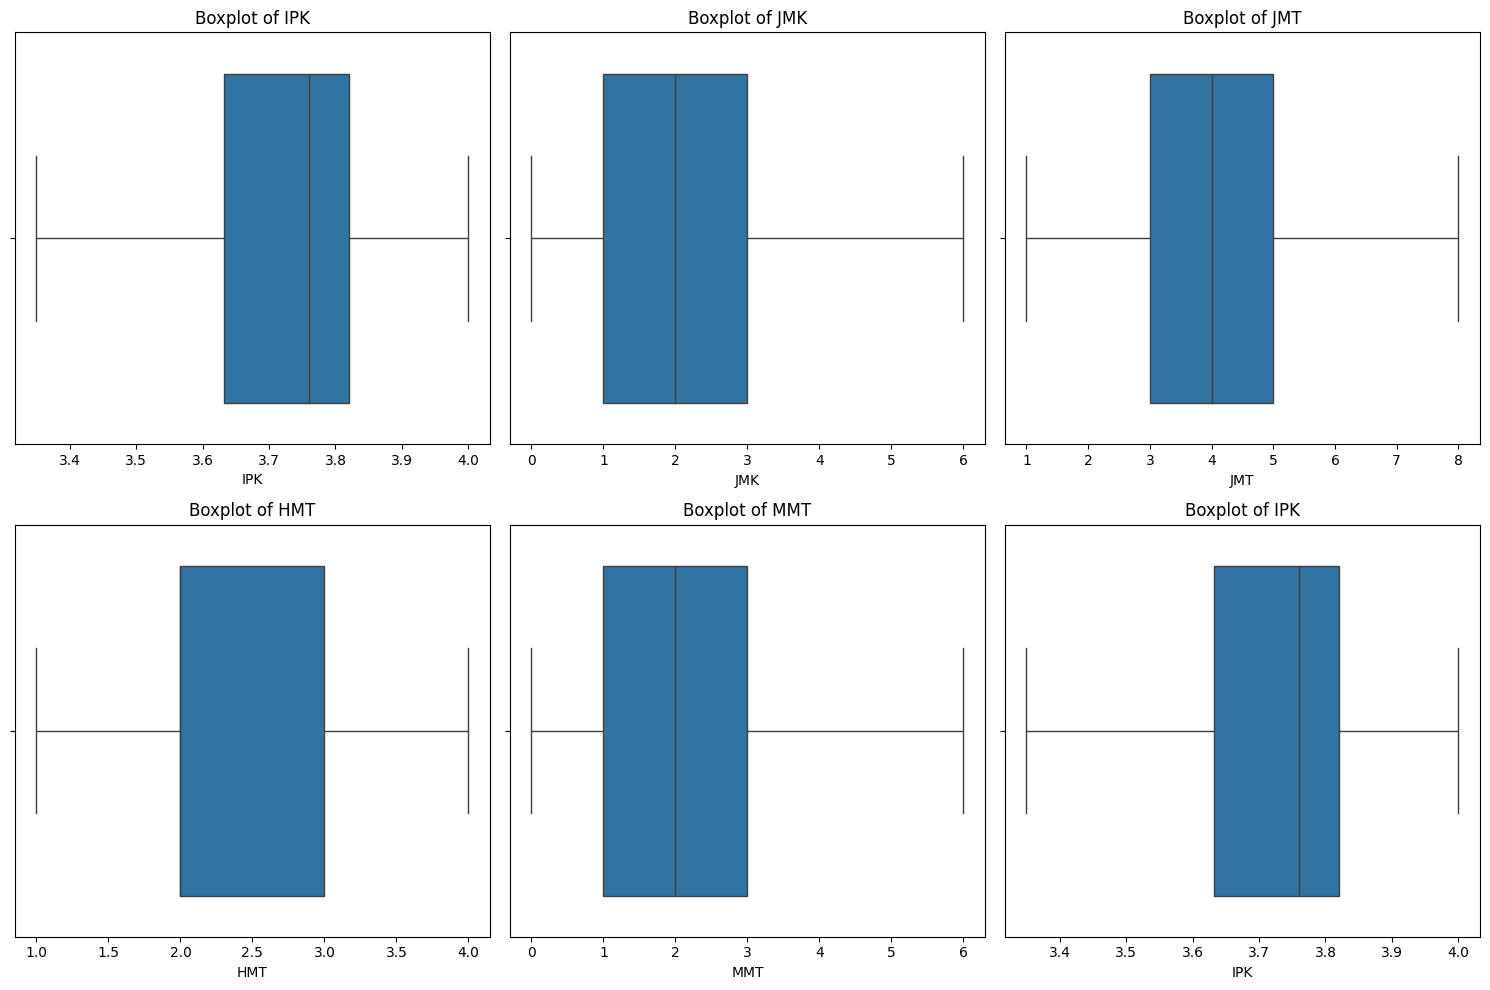

In [8]:
# --- 3. Tangani IPK dengan clipping ---
Q1 = df['IPK'].quantile(0.25)
Q3 = df['IPK'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['IPK'] = df['IPK'].clip(lower=batas_bawah, upper=batas_atas)

# setelah imputasi → buat boxplot semua kolom numerik + IPK
all_numeric = list(outlier_cols) + ['IPK']

plt.figure(figsize=(15, 5 * ((len(all_numeric) + 2) // 3)))

for i, col in enumerate(all_numeric, 1):
    plt.subplot((len(all_numeric) + 2) // 3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [9]:

# 1. Ambil skor 1–5 dari string seperti "3  = Cukup penting"
def ambil_skor_1_5(x):
    if pd.isna(x):
        return pd.NA
    if isinstance(x, str):
        m = re.match(r'\s*(\d)', x)
        if not m:
            return pd.NA
        return int(m.group(1))
    return int(x)

# pastikan tiga variabel ini sudah jadi angka 1–5
for col in ['PIK', 'MM', 'DBDT']:
    df[col + '_skor'] = df[col].apply(ambil_skor_1_5)

# 2. Mapping 3 kategori, disesuaikan per variabel

def kategori_PIK(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak penting'
    elif x == 3:
        return 'cukup penting'
    elif x in (4, 5):
        return 'sangat penting'
    return pd.NA

def kategori_MM(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak berpengaruh'
    elif x == 3:
        return 'cukup berpengaruh'
    elif x in (4, 5):
        return 'sangat berpengaruh'
    return pd.NA

def kategori_DBDT(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak berdampak'
    elif x == 3:
        return 'cukup berdampak'
    elif x in (4, 5):
        return 'sangat berdampak'
    return pd.NA

df['PIK_3kat']  = df['PIK_skor'].apply(kategori_PIK)
df['MM_3kat']   = df['MM_skor'].apply(kategori_MM)
df['DBDT_3kat'] = df['DBDT_skor'].apply(kategori_DBDT)

# optional: jadikan ordered category biar rapi
df['PIK_3kat'] = pd.Categorical(
    df['PIK_3kat'],
    categories=['tidak penting', 'cukup penting', 'sangat penting'],
    ordered=True
)

df['MM_3kat'] = pd.Categorical(
    df['MM_3kat'],
    categories=['tidak berpengaruh', 'cukup berpengaruh', 'sangat berpengaruh'],
    ordered=True
)

df['DBDT_3kat'] = pd.Categorical(
    df['DBDT_3kat'],
    categories=['tidak berdampak', 'cukup berdampak', 'sangat berdampak'],
    ordered=True
)

# Kalau mau cek distribusinya:
for col in ['PIK_3kat', 'MM_3kat', 'DBDT_3kat']:
    print(f'\nDistribusi {col}:')
    print(df[col].value_counts(dropna=False))

df


Distribusi PIK_3kat:
PIK_3kat
cukup penting     78
sangat penting    69
tidak penting     10
Name: count, dtype: int64

Distribusi MM_3kat:
MM_3kat
cukup berpengaruh     81
tidak berpengaruh     42
sangat berpengaruh    34
Name: count, dtype: int64

Distribusi DBDT_3kat:
DBDT_3kat
cukup berdampak     91
sangat berdampak    52
tidak berdampak     14
Name: count, dtype: int64


,FAKULTAS,JURUSAN,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW,PIK_skor,MM_skor,DBDT_skor,PIK_3kat,MM_3kat,DBDT_3kat
0,Fakultas Ilmu Komputer,Informatika,3.93,Ya,1.0,3 = Cukup penting,3.0,2.0,Tidak,1.0,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya,3,2,4,cukup penting,tidak berpengaruh,sangat berdampak
1,Fakultas Ilmu Komputer,Sains Data,3.67,Ya,1.0,3 = Cukup penting,5.0,4.0,Tidak,4.0,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak,3,1,3,cukup penting,tidak berpengaruh,cukup berdampak
2,Fakultas Ilmu Komputer,Informatika,3.50,Tidak,0.0,3 = Cukup penting,2.0,1.0,Ya,2.0,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya,3,1,2,cukup penting,tidak berpengaruh,tidak berdampak
3,Fakultas Ilmu Komputer,Sistem Informasi,3.78,Ya,2.0,3 = Cukup penting,3.0,2.0,Tidak,0.0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak,3,1,4,cukup penting,tidak berpengaruh,sangat berdampak
4,Fakultas Ilmu Komputer,Sains Data,3.93,Tidak,0.0,2 = Kurang penting,5.0,3.0,Ya,3.0,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak,2,4,4,tidak penting,sangat berpengaruh,sangat berdampak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Fakultas Arsitektur dan Desain,DKV,3.76,Tidak,0.0,3 = Cukup penting,6.0,4.0,Ya,0.0,1 = Tidak berpengaruh,Tidak,4 = Berdampak,Ya,3,1,4,cukup penting,tidak berpengaruh,sangat berdampak
153,Fakultas Ilmu Komputer,Sistem Informasi,3.80,Ya,3.0,4 = Penting,8.0,2.0,Tidak,0.0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya,4,3,3,sangat penting,cukup berpengaruh,cukup berdampak
154,Fakultas Ilmu Komputer,Sains Data,3.80,Ya,1.0,3 = Cukup penting,3.0,1.0,Tidak,2.0,3 = Cukup berpengaruh,Tidak,3 = Cukup berdampak,Ya,3,3,3,cukup penting,cukup berpengaruh,cukup berdampak
155,Fakultas Hukum,Ilmu Hukum,3.79,Ya,3.0,3 = Cukup penting,2.0,2.0,Tidak,5.0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya,3,3,3,cukup penting,cukup berpengaruh,cukup berdampak


In [10]:
# drop kolom
df = df.drop(columns=["FAKULTAS", "JURUSAN", "PIK", "MM", "DBDT", "PIK_skor", "MM_skor", "DBDT_skor"])

# cek hasil
df.head()

,IPK,IK,JMK,JMT,HMT,KKM,MMT,MTS,MW,PIK_3kat,MM_3kat,DBDT_3kat
0,3.93,Ya,1.0,3.0,2.0,Tidak,1.0,Ya,Ya,cukup penting,tidak berpengaruh,sangat berdampak
1,3.67,Ya,1.0,5.0,4.0,Tidak,4.0,Ya,Tidak,cukup penting,tidak berpengaruh,cukup berdampak
2,3.50,Tidak,0.0,2.0,1.0,Ya,2.0,Tidak,Ya,cukup penting,tidak berpengaruh,tidak berdampak
3,3.78,Ya,2.0,3.0,2.0,Tidak,0.0,Ya,Tidak,cukup penting,tidak berpengaruh,sangat berdampak
4,3.93,Tidak,0.0,5.0,3.0,Ya,3.0,Tidak,Tidak,tidak penting,sangat berpengaruh,sangat berdampak


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Encode Y
df["MW_bin"] = df["MW"].map({"Ya": 1, "Tidak": 0})
y = df["MW_bin"]


In [12]:
X_raw = df.drop(columns=["MW", "MW_bin"])


In [31]:
X = X_raw.copy()

# Daftar variabel kategorik
cat_cols = [
    'IK',
    'KKM',
    'MTS',
    'PIK_3kat',
    'MM_3kat',
    'DBDT_3kat'
]

for c in cat_cols:
    X[c] = X[c].astype("category").cat.codes


In [33]:
for c in cat_cols:
    print(f"Mapping {c}:")
    print(X_raw[c].astype("category").cat.categories)


Mapping IK:
Index(['Tidak', 'Ya'], dtype='object')
Mapping KKM:
Index(['Tidak', 'Ya'], dtype='object')
Mapping MTS:
Index(['Tidak', 'Ya'], dtype='object')
Mapping PIK_3kat:
Index(['tidak penting', 'cukup penting', 'sangat penting'], dtype='object')
Mapping MM_3kat:
Index(['tidak berpengaruh', 'cukup berpengaruh', 'sangat berpengaruh'], dtype='object')
Mapping DBDT_3kat:
Index(['tidak berdampak', 'cukup berdampak', 'sangat berdampak'], dtype='object')


In [35]:
X = sm.add_constant(X)


In [37]:
model = sm.Logit(y, X)
result = model.fit()

print(result.summary(alpha=0.1))


Optimization terminated successfully.
         Current function value: 0.276548
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 MW_bin   No. Observations:                  157
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                  0.1935
Time:                        16:25:56   Log-Likelihood:                -43.418
converged:                       True   LL-Null:                       -53.836
Covariance Type:            nonrobust   LLR p-value:                   0.03511
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.2246      7.367     -0.573      0.566     -16.342       7.892
IPK            1.1960      1.

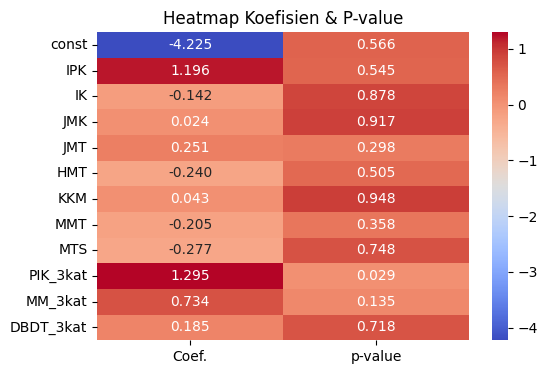

In [39]:
# Ambil tabel koefisien langsung dari summary2
tabel = result.summary2().tables[1]

coef = tabel["Coef."]
pvals = tabel["P>|z|"]

df_coef_heat = pd.DataFrame({
    "Coef.": coef,
    "p-value": pvals
})

plt.figure(figsize=(6, 4))
sns.heatmap(df_coef_heat, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap Koefisien & P-value")
plt.show()

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_prob, g=10):
    data = pd.DataFrame({'y': y_true, 'prob': y_prob}).copy()

    # bikin kelompok berdasarkan quantile probability
    data['group'] = pd.qcut(data['prob'], g, duplicates='drop')

    # Observed
    obs = data.groupby('group')['y'].agg(['sum', 'count'])
    obs.columns = ['obs_1', 'total']
    obs['obs_0'] = obs['total'] - obs['obs_1']

    # Expected
    exp_1 = data.groupby('group')['prob'].sum()
    exp_0 = obs['total'] - exp_1

    # Hindari pembagian 0 (kalau ada grup exp=0)
    eps = 1e-12
    hl_stat = (((obs['obs_1'] - exp_1)**2 / (exp_1 + eps)) +
               ((obs['obs_0'] - exp_0)**2 / (exp_0 + eps))).sum()

    df = (len(obs) - 2)  # pakai jumlah grup aktual (kadang < g)
    p_value = 1 - chi2.cdf(hl_stat, df)

    return hl_stat, p_value, obs, exp_1

# ====== PEMAKAIAN ======
y_prob = result.predict(X)  # pastikan result & X sudah ada
hl_stat, p_value, obs_table, exp_1 = hosmer_lemeshow_test(y, y_prob, g=10)

print("Hosmer-Lemeshow Chi-square:", hl_stat)
print("df:", len(obs_table) - 2)
print("p-value:", p_value)


Hosmer-Lemeshow Chi-square: 4.7469052980137585
df: 8
p-value: 0.7842529713025936


C:\Users\Maria Dwi\AppData\Local\Temp\ipykernel_41888\1129481586.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs = data.groupby('group')['y'].agg(['sum', 'count'])
C:\Users\Maria Dwi\AppData\Local\Temp\ipykernel_41888\1129481586.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_1 = data.groupby('group')['prob'].sum()


In [43]:
pvals = result.pvalues
sig_vars = pvals[pvals < 0.1].index.tolist()
sig_vars = [v for v in sig_vars if v != "const"]

print("Variabel signifikan:", sig_vars)

Variabel signifikan: ['PIK_3kat']


In [45]:
X_sig = X[sig_vars]
X_sig = sm.add_constant(X_sig)
logit_sig = sm.Logit(y, X_sig)
result_sig = logit_sig.fit()

print(result_sig.summary2())


Optimization terminated successfully.
         Current function value: 0.302861
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: MW_bin           Pseudo R-squared: 0.117     
Date:               2025-12-15 16:26 AIC:              99.0983   
No. Observations:   157              BIC:              105.2108  
Df Model:           1                Log-Likelihood:   -47.549   
Df Residuals:       155              LL-Null:          -53.836   
Converged:          1.0000           LLR p-value:      0.00039121
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
const        0.3114     0.5309   0.5866   0.5575   -0.7291   1.3519
PIK_3kat     1.5445     0.4667   3.3090   0.0009    0.6296

In [49]:
print("Model signifikan - AIC:", result_sig.aic, "BIC:", result_sig.bic)

Model signifikan - AIC: 99.09832686636224 BIC: 105.21081847705887


In [57]:
# Ambil tabel koefisien
tabel = result.summary2().tables[1]

# Ambil variabel signifikan (α = 0.1)
sig = tabel[tabel['P>|z|'] < 0.1].copy()

# Hitung Odds Ratio (TANPA CI)
sig['OR'] = np.exp(sig['Coef.'])

# Rapihin urutan
sig = sig.sort_values('OR')

# Tampilkan tabel akhir
sig[['Coef.', 'P>|z|', 'OR']]

,Coef.,P>|z|,OR
PIK_3kat,1.294695,0.028967,3.649884


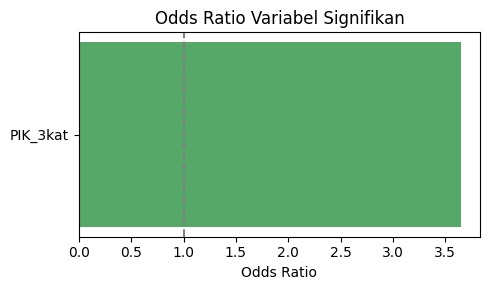

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

colors = ['#55A868', '#4C72B0', '#8172B3']  # hijau - biru - ungu

plt.barh(
    sig.index,
    sig['OR'],
    color=colors
)

plt.axvline(1, linestyle='--', color='gray')
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio Variabel Signifikan')

plt.tight_layout()
plt.show()

In [61]:

# 1. Log-likelihood masing-masing model
ll_full = result.llf
ll_red  = result_sig.llf

# 2. Jumlah parameter (lebih aman pakai jumlah koefisien)
k_full = len(result.params)
k_red  = len(result_sig.params)

# 3. Statistik LR
LR_stat = -2 * (ll_red - ll_full)
df_lr   = k_full - k_red

p_lr = 1 - chi2.cdf(LR_stat, df_lr)

print("Log-likelihood full   :", ll_full)
print("Log-likelihood reduced:", ll_red)
print("LR statistic           :", LR_stat)
print("df                     :", df_lr)
print("p-value LR             :", p_lr)


Log-likelihood full   : -43.418024928409636
Log-likelihood reduced: -47.54916343318112
LR statistic           : 8.26227700954297
df                     : 10
p-value LR             : 0.6032348748539885


In [63]:
hasil_wald = {}

for var in sig_vars:
    test = result.wald_test(f"{var} = 0")
    hasil_wald[var] = {
        "chi2": float(test.statistic),   # statistik Wald (χ²)
        "df": 1,                         # 1 parameter diuji → df = 1
        "pvalue": float(test.pvalue)     # p-value
    }

wald_df = pd.DataFrame(hasil_wald).T

# deteksi otomatis kolom p-value (jaga-jaga namanya beda)
pcol = wald_df.filter(regex='p', axis=1).columns[0]
wald_df['Sig_10%'] = wald_df[pcol] < 0.10

wald_df


C:\Users\Maria Dwi\anaconda3\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\Maria Dwi\AppData\Local\Temp\ipykernel_41888\1339448824.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "chi2": float(test.statistic),   # statistik Wald (χ²)


,chi2,df,pvalue,Sig_10%
PIK_3kat,4.769547,1.0,0.028967,True


C:\Users\Maria Dwi\AppData\Local\Temp\ipykernel_41888\1441966544.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


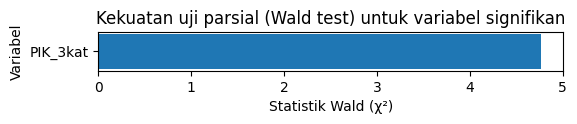

In [65]:


# Ambil hanya variabel signifikan
wald_sig = wald_df[wald_df['Sig_10%']].copy()

# Urutkan berdasarkan chi-square
wald_sig = wald_sig.sort_values('chi2')

plt.figure(figsize=(6, 0.5*len(wald_sig)))
plt.barh(wald_sig.index, wald_sig['chi2'])
plt.xlabel('Statistik Wald (χ²)')
plt.ylabel('Variabel')
plt.title('Kekuatan uji parsial (Wald test) untuk variabel signifikan')
plt.tight_layout()
plt.show()


In [81]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ====== STEP 1: Ambil X (independen saja) ======
X = df.drop(columns=['MW', 'MW_bin'])

# ====== STEP 2: Encode SEMUA kolom object/category ======
for col in X.columns:
    if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
        X[col] = X[col].astype('category').cat.codes

# ====== STEP 3: Paksa numeric + bersihkan ======
X = X.apply(pd.to_numeric, errors='coerce')
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# ====== STEP 4: Hitung VIF ======
X_const = sm.add_constant(X)

vif_data = pd.DataFrame({
    "Variable": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})

# ====== STEP 5: BUANG KONSTANTA ======
vif_data = vif_data[vif_data["Variable"] != "const"]

vif_data


,Variable,VIF
1,IPK,1.071970
2,IK,1.438530
3,JMK,1.348282
4,JMT,1.123227
5,HMT,1.069179
6,KKM,1.143129
7,MMT,1.124942
8,MTS,1.129558
9,PIK_3kat,1.377151
10,MM_3kat,1.261424


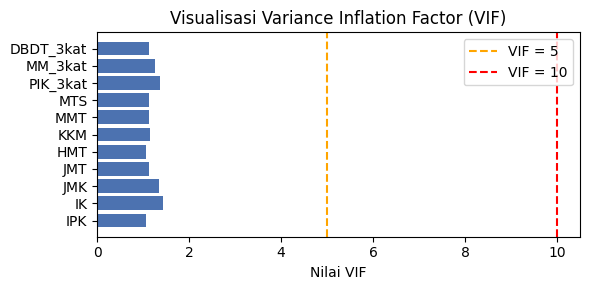

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

plt.barh(
    vif_data['Variable'],
    vif_data['VIF'],
    color='#4C72B0'
)

plt.axvline(5, linestyle='--', color='orange', label='VIF = 5')
plt.axvline(10, linestyle='--', color='red', label='VIF = 10')

plt.xlabel('Nilai VIF')
plt.title('Visualisasi Variance Inflation Factor (VIF)')
plt.legend()

plt.tight_layout()
plt.show()
